Linear Regression

In [53]:
# Use seaborn for pairplot
!pip install -q seaborn

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [55]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [56]:
# This is the dataset AUTO MPG. It provides a description of the automobiles in the period of
# late -1970s and early 1980. It provides a description of automobiles at that time.
# The description includes: cylinders, displacement, horsepower, and weight.

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [57]:
# .copy() function is a pandas function that creates a copy of a dataframe
# .tail() function is a pandas function that gets the last 5 rows of the dataframe

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [58]:
# Clean the data
# .isna() is a pandas function that detects missing values
# There are 6 missing values in the Horsepower field
# .sum() is a pandas function that returns the sum of the values over the requested axis
# in this case the axis is the data fields

dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [59]:
# Clean the data
# .dropna()is a pandas function that removes missing values

dataset = dataset.dropna()

In [60]:
# Clean the data
# We can see now that the 6 missing values in Horsepower were eliminated
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [61]:
# Data Transformation
# The Origin column is categorical not numeric so it needs to be converted to
# one-hot-encoding
# This is a Pandas dataframe using the .map() function. The .map() function maps values of a series
# according to input correspondence. It is used for substituting each value in a series with
# another value that might be derived from a function, a dictionary or a series


dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [62]:
# Data Transformation
# After using the function .map() for pandas dataframes, we did the one-hot-encoding for the column
# Origin and we mapped 1 to USA, 2 to Europe and 3 to Japan. Now the colum origin has the values of
# USA, Europe and Japan instead of 1, 2 and 3 that originally had.
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [63]:
# Transform data
# Now we use the function .getdummies() for pandas dataframes.
# .getdummies() converts categorical variable into dummy/indicator variables

dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')


In [64]:
# Transform data
# Now we don't have the Origin column in the dataset the function .get_dummies changed that
# It created a one-hot-encoding and created a 3 new columns instead of Origin and if
# the data record belongs ot that category it puts a 1 otherwise it puts a 0

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [65]:
# Split data into train set and test set
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [66]:
# Split data into train set and test set
# Train set
train_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0
182,28.0,4,107.0,86.0,2464.0,15.5,76,1,0,0


In [67]:
# Split data into train set and test set
# Test set

test_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
369,34.0,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,36.0,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0,1,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


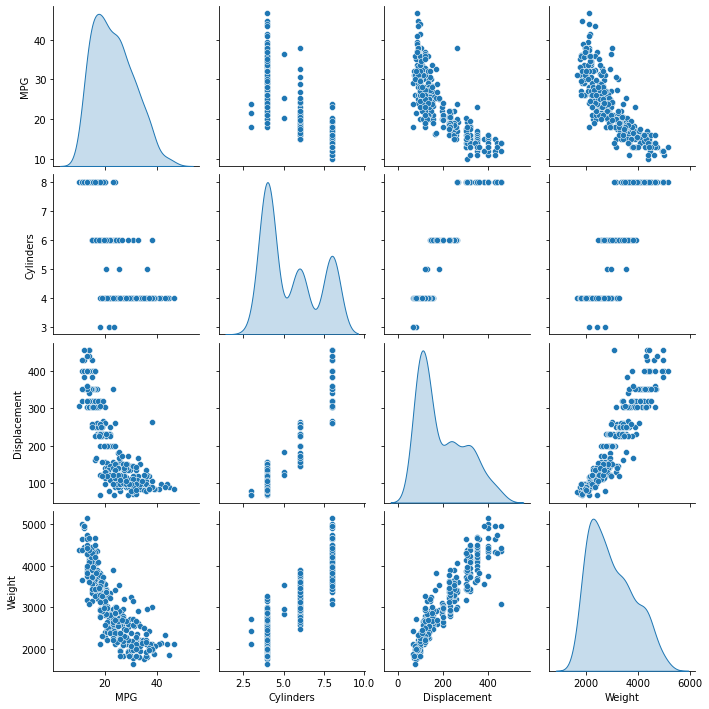

In [68]:
# Inspect the data
# A quick look of the joint distribution of a few pairs of columns from the training set

sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

# The top row shows that the fuel efficiency (MPG) is a function of all the other parameters.
# The other rows show that they are each functions of each other.


In [69]:
# Inspect the data
# The function .describe() is a Pandas function that displays basic statistical
# details like percentil, mean, std, etc. for a pandas dataframe or a series of numeric values

train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [70]:
# Inspect the data
# Function .transpose() converts rows into columns and columns into rows

train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [71]:
# Split the features from labels

# Separate the target value, the "label", from the features. 

# This label is the value that you will train the model to predict.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [72]:
train_features.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [73]:
test_features.describe()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,5.448718,190.762821,102.858974,2926.589744,15.469231,76.307692,0.153846,0.217949,0.628205
std,1.740633,106.494733,40.255265,874.900416,2.649298,3.721847,0.363137,0.415525,0.486412
min,3.000000,70.000000,48.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,98.000000,74.250000,2159.500000,13.700000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,138.000000,90.000000,2692.500000,15.250000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,292.000000,121.750000,3706.500000,17.000000,79.750000,0.000000,0.000000,1.000000
max,8.000000,400.000000,230.000000,4746.000000,22.200000,82.000000,1.000000,1.000000,1.000000


In [74]:
train_labels.describe()

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [75]:
test_labels.describe()

count    78.000000
mean     23.991026
std       8.133563
min       9.000000
25%      18.000000
50%      24.000000
75%      29.875000
max      44.300000
Name: MPG, dtype: float64

In [76]:
train_features.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0
182,4,107.0,86.0,2464.0,15.5,76,1,0,0


In [77]:
test_features.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
369,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,4,91.0,67.0,1965.0,15.7,82,0,1,0
396,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [78]:
train_labels.tail()

281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, dtype: float64

In [79]:
test_labels.tail()

369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, dtype: float64

In [80]:
# Normalization
# Normalize features that use different scales and ranges.
# Normalization is a good practice.
# It is important because the feautures are multiplied by the model weights.
# So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.
# A model might converge without feature normalization but normalization makes training more stable.

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [81]:
# The Normalization layer
# The preprocessing.Normalization layer is way to build that preprocessing into your model.

# The first step is to create the layer:

normalizer = preprocessing.Normalization()

In [82]:
# Then .adapt() it to the data:

normalizer.adapt(np.array(train_features))

In [83]:
# This calculates the mean and variance, and stores them in the layer.
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [84]:
# When the layer is called it returns the input data, with each feature independently normalized:

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [85]:
# Linear regression

# Before building a DNN model, start with a linear regression.

# One Variable
# Start with a single-variable linear regression, to predict MPG from Horsepower.

# Training a model with tf.keras typically starts by defining the model architecture.

# In this case use a keras.Sequential model. This model represents a sequence of steps. In this case there are two steps:

# Normalize the input horsepower.
# Apply a linear transformation ( y=mx+b ) to produce 1 output using layers.Dense.
# The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

In [86]:
# First create the horsepower Normalization layer:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

In [87]:
# Build the sequential model:

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [88]:
# This model will predict MPG from Horsepower.

# Run the untrained model on the first 10 horse-power values. 

# The output won't be good, but you'll see that it has the expected shape, (10,1):

horsepower_model.predict(horsepower[:10])

array([[-0.35 ],
       [-0.198],
       [ 0.646],
       [-0.49 ],
       [-0.444],
       [-0.174],
       [-0.526],
       [-0.444],
       [-0.116],
       [-0.198]], dtype=float32)

In [89]:
# Once the model is built, configure the training procedure using the Model.compile() method.
# The most important arguments to compile are the loss and the optimizer since these define what will be optimized 
# (mean_absolute_error) and how (using the optimizers.Adam).

horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [90]:
# Once the training is configured, use Model.fit() to execute the training:

%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.51 s, sys: 178 ms, total: 6.69 s
Wall time: 6.47 s


In [91]:
# Visualize the model's training progress using the stats stored in the history object.

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802364,4.184921,95
96,3.804899,4.192125,96
97,3.802741,4.180804,97
98,3.806226,4.179145,98
99,3.803369,4.204762,99


In [92]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

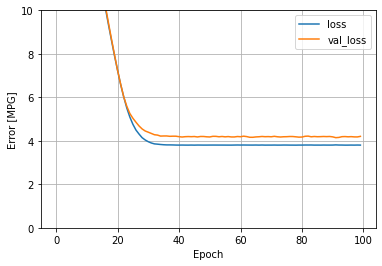

In [93]:
plot_loss(history)

In [94]:
# Collect the results on the test set, for later:

test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [95]:
# Since this is a single variable regression it's easy to look at the model's predictions as a function of the input:

x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [96]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

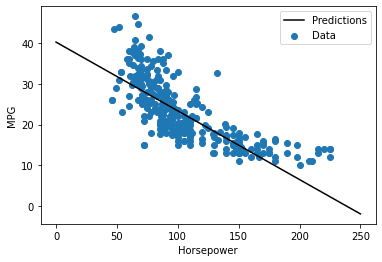

In [97]:
plot_horsepower(x,y)

In [98]:
# Multiple inputs
# You can use an almost identical setup to make predictions based on multiple inputs.
# This model still does the same  y=mx+b  except that  m  is a matrix and  b  is a vector.
# This time use the Normalization layer that was adapted to the whole dataset.

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [99]:
# When you call this model on a batch of inputs, it produces units=1 outputs for each example.
linear_model.predict(train_features[:10])

array([[-0.636],
       [ 0.776],
       [-0.499],
       [ 0.762],
       [ 0.65 ],
       [ 0.938],
       [ 0.785],
       [ 1.689],
       [ 0.087],
       [-0.387]], dtype=float32)

In [100]:
# When you call the model it's weight matrices will be built. 
# Now you can see that the kernel (the  m  in  y=mx+b ) has a shape of (9,1).

linear_model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.148],
       [ 0.134],
       [-0.208],
       [ 0.149],
       [ 0.483],
       [ 0.586],
       [ 0.301],
       [ 0.264],
       [ 0.484]], dtype=float32)>

In [101]:
# Use the same compile and fit calls as for the single input horsepower model:

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [102]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 6.52 s, sys: 169 ms, total: 6.68 s
Wall time: 6.42 s


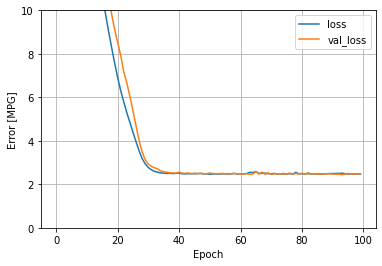

In [103]:
# Using all the inputs achieves a much lower training and validation error than the horsepower model:

plot_loss(history)

In [104]:
# Collect the results on the test set, for later:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [104]:
# A DNN regression

# The previous section implemented linear models for single and multiple inputs.
# This section implements single-input and multiple-input DNN models. 
# The code is basically the same except the model is expanded to include some "hidden" non-linear layers. 
# The name "hidden" here just means not directly connected to the inputs or outputs.

# These models will contain a few more layers than the linear model:

# The normalization layer.
# Two hidden, nonlinear, Dense layers using the relu nonlinearity.
# A linear single-output layer.
# Both will use the same training procedure so the compile method is included in the build_and_compile_model function below

In [105]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [106]:
# One variable

# Start with a DNN model for a single input: "Horsepower"

dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [107]:
# This model has quite a few more trainable parameters than the linear models.

dnn_horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [108]:
# Train the model:

%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.13 s, sys: 225 ms, total: 7.36 s
Wall time: 6.98 s


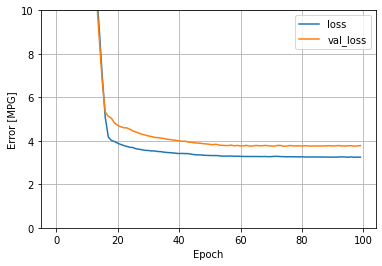

In [109]:
# This model does slightly better than the linear-horsepower model.
plot_loss(history)

In [110]:
# If you plot the predictions as a function of Horsepower, 
# you'll see how this model takes advantage of the nonlinearity 
# provided by the hidden layers:

x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

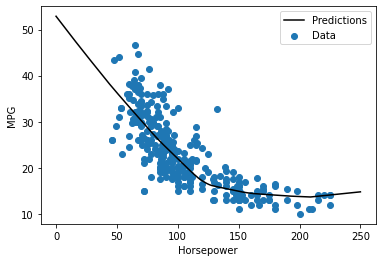

In [111]:
plot_horsepower(x, y)

In [112]:
# Collect the results on the test set, for later:

test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [113]:
# Full model

# If you repeat this process using all the inputs it slightly improves the performance on the validation dataset.

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [114]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 7.13 s, sys: 200 ms, total: 7.33 s
Wall time: 6.92 s


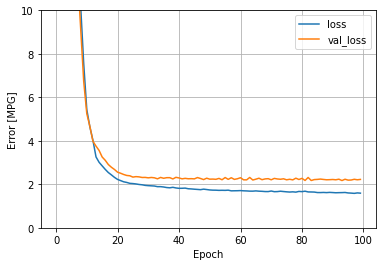

In [115]:
plot_loss(history)

In [118]:
# Collect the results on the test set:

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [119]:
# Performance

# Now that all the models are trained check the test-set performance and see how they did:

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

# These results match the validation error seen during training.

,Mean absolute error [MPG]
horsepower_model,3.650426
linear_model,2.505671
dnn_horsepower_model,2.915534
dnn_model,1.715358


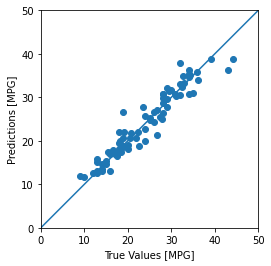

In [120]:
# Make predictions
# Finally, predict have a look at the errors made by the model when making predictions on the test set:

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

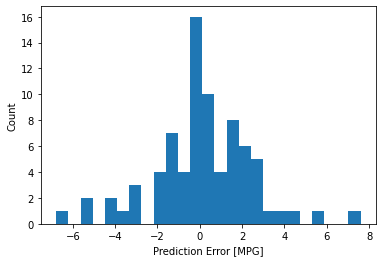

In [121]:
# It looks like the model predicts reasonably well.
# Now take a look at the error distribution:

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [122]:
# If you're happy with the model save it for later use:

dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [123]:
# If you reload the model, it gives identical output:

reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [124]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.650426
linear_model,2.505671
dnn_horsepower_model,2.915534
dnn_model,1.715358
reloaded,1.715358


In [ ]:
# Conclusion
# This notebook introduced a few techniques to handle a regression problem. 
# Here are a few more tips that may help:

# Mean Squared Error (MSE) and Mean Absolute Error (MAE) are common loss functions used for regression problems. 
# Mean Absolute Error is less sensitive to outliers. Different loss functions are used for classification problems.
# Similarly, evaluation metrics used for regression differ from classification.
# When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
# Overfitting is a common problem for DNN models, it wasn't a problem for this tutorial. 
# See the overfit and underfit tutorial for more help with this.